In [1]:
import argparse
import os
import json
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import uproot3
from matplotlib.offsetbox import AnchoredText
from util import make_dirs

Welcome to JupyROOT 6.12/07


/cvmfs/cms.cern.ch/slc7_amd64_gcc700/lcg/root/6.12.07-gnimlf5/lib/ROOT.py:318: DeprecationWarning: Python 2 has reached EOL. mplhep is in a deprecated mode. Please switch to Python 3.
  return _orig_ihook( name, *args, **kwds )


In [2]:
def plotTF_ratio_ggf(in_ratio, mask, region, args=None, zrange=None):
    fig, ax = plt.subplots()

    H = np.ma.masked_where(in_ratio * mask <= 0.01, in_ratio * mask)
    print(H)
    zmin, zmax = np.nanmin(H), np.nanmax(H)
    if zrange is None:
        # Scale clim to fit range up to a max of 0.6                                                          
        clim = np.max([.3, np.min([0.6, 1 - zmin, zmax - 1])])
    else:
        clim = zrange
    ptbins = np.array([450, 500, 550, 600, 675, 800, 1200])
    if 'vbf' in region:
        ptbins = np.array([450,1200])

    msdbins = np.linspace(40, 201, 24)
    hep.hist2dplot(H.T,
                   msdbins,
                   ptbins,
                   vmin=1 - clim,
                   vmax=1 + clim,
                   cmap='RdBu_r',
                   cbar=False)
    cax = hep.make_square_add_cbar(ax, pad=0.2, size=0.5)
    if abs(1 - zmin) > .3 and abs(1 - zmax) > .3:
        c_extend = 'both'
    elif abs(1 - zmin) > .3:
        c_extend = 'min'
    elif abs(1 - zmax) > .3:
        c_extend = 'max'
    else:
        c_extend = 'neither'
    cbar = fig.colorbar(ax.get_children()[0], cax=cax, extend=c_extend)

    ax.set_xticks(np.arange(40, 220, 20))
    ax.tick_params(axis='y', which='minor', left=False, right=False)
    ax.invert_yaxis()

    ax.set_title('{} QCD Ratio'.format(region), pad=15, fontsize=26)
    ax.set_xlabel(r'Jet $\mathrm{m_{SD}}$', ha='right', x=1)
    ax.set_ylabel(r'Jet $\mathrm{p_{T}}$', ha='right', y=1)
    cbar.set_label(r'(Pass QCD) / (Fail QCD * eff)', ha='right', y=1)
    return ax

In [3]:
year = "2016APV"
f = uproot3.open('fitDiagnosticsTest.root')
g = uproot3.open('signalregion.root')

[[1.2065384  1.1560512  1.1121281  1.0732574  1.0383956  1.0067925
  0.97789055 0.9512644  0.92658144 0.9035774  0.8820381  0.8617884
  0.84268236 0.8245979  0.80743104 0.79109335 0.7755082  0.76060957
  0.7601496  0.7601496  0.76014954 0.76014954 0.76014954]
 [1.241095   1.1906075  1.1466848  1.1078138  1.0729522  1.0413489
  1.012447   0.9858209  0.96113795 0.93813366 0.9165946  0.89634484
  0.8772388  0.85915434 0.84198755 0.8256498  0.8100647  0.7951659
  0.78089577 0.767203   0.76014954 0.76014954 0.76014954]
 [1.2724469  1.2219595  1.1780366  1.1391658  1.1043038  1.0727009
  1.0437989  1.0171728  0.9924898  0.96948576 0.9479466  0.9276967
  0.9085908  0.89050615 0.8733395  0.8570017  0.8414166  0.82651794
  0.81224763 0.798555   0.78539497 0.7727275  0.7605174 ]
 [1.3052399  1.2547526  1.2108297  1.1719589  1.1370969  1.1054939
  1.0765921  1.0499659  1.0252827  1.0022787  0.98073953 0.96048975
  0.9413837  0.9232993  0.9061325  0.8897947  0.87420964 0.8593109
  0.8450407  0.831

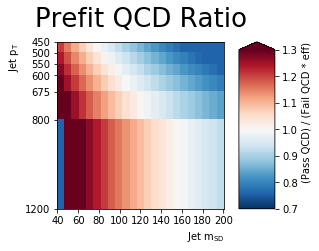

In [4]:
cat = 'ggf'
fail_qcd, pass_qcd = [], []
bins = []

nptbins = 6

for ipt in range(nptbins):
    fail_qcd.append(f['shapes_{}/ptbin{}{}{}{}/qcd;1'.format('prefit', ipt, cat, 'fail', year)].values)
    pass_qcd.append(f['shapes_{}/ptbin{}{}{}{}/qcd;1'.format('prefit', ipt, cat, 'pass', year)].values)

fail_qcd = np.array(fail_qcd)
pass_qcd = np.array(pass_qcd)

mask = ~np.isclose(pass_qcd, np.zeros_like(pass_qcd))
mask *= ~np.isclose(fail_qcd, np.zeros_like(fail_qcd))
q = np.sum(pass_qcd[mask]) / np.sum(fail_qcd[mask])
in_data_rat_prefit = (pass_qcd / (fail_qcd * q))

ax = plotTF_ratio_ggf(in_data_rat_prefit, mask, region="Prefit")
ax.figure.savefig('{}/{}{}_{}.png'.format('plots/', "TF_ratio_", 'ggf2d', year),
                  bbox_inches="tight", dpi=300)
ax.figure.savefig('{}/{}{}_{}.pdf'.format('plots/', "TF_ratio_", 'ggf2d', year),
                  bbox_inches="tight", transparent=True)

[[1.0377312  0.93794096 0.8809896  0.8515505  0.8403278  0.84141606
  0.8509257  0.8662201  0.8854699  0.90738255 0.9310305  0.9557411
  0.9810217  1.0065093  1.031936   1.0571036  1.0818665  1.1061176
  1.1068742  1.1068742  1.1068742  1.1068743  1.1068742 ]
 [1.1641935  1.0130637  0.92199856 0.86998683 0.84420043 0.8364342
  0.8412436  0.85490876 0.87482655 0.8991399  0.92650265 0.95592624
  0.98667693 1.0182068  1.0501026  1.0820533  1.1138229  1.145234
  1.1761527  1.2064792  1.2223196  1.2223195  1.2223195 ]
 [1.3406911  1.1254381  0.9899713  0.90692854 0.859509   0.8369015
  0.83188695 0.8394996  0.85623914 0.8795892  0.9077094  0.9392356
  0.9731453  1.0086643  1.045202   1.0823066  1.1196293  1.1569012
  1.1939154  1.230512   1.2665683  1.3019915  1.336711  ]
 [1.6115154  1.3075933  1.1089824  0.98026395 0.89956707 0.8527363
  0.8302615  0.8255587  0.8339555  0.85206795 0.8774017  0.9080924
  0.94272834 0.9802306  1.019767   1.0606911  1.1024977  1.144791
  1.1872593  1.2296573

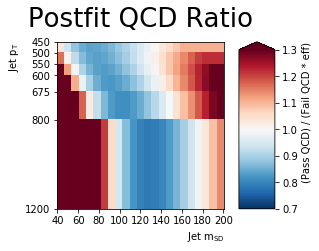

In [5]:
region = 'postfit'
cat = 'ggf'
fail_qcd, pass_qcd = [], []
bins = []

nptbins = 6

for ipt in range(nptbins):
    fail_qcd.append(f['shapes_{}/ptbin{}{}{}{}/qcd;1'.format('fit_s', ipt, cat, 'fail', year)].values)
    pass_qcd.append(f['shapes_{}/ptbin{}{}{}{}/qcd;1'.format('fit_s', ipt, cat, 'pass', year)].values)

fail_qcd = np.array(fail_qcd)
pass_qcd = np.array(pass_qcd)

mask = ~np.isclose(pass_qcd, np.zeros_like(pass_qcd))
mask *= ~np.isclose(fail_qcd, np.zeros_like(fail_qcd))
q = np.sum(pass_qcd[mask]) / np.sum(fail_qcd[mask])
in_data_rat_postfit = (pass_qcd / (fail_qcd * q))

ax = plotTF_ratio_ggf(in_data_rat_postfit, mask, region="Postfit")
ax.figure.savefig('{}/{}{}_{}.png'.format('plots/', "TF_ratio_", 'ggf2d', year),
                  bbox_inches="tight", dpi=300)
ax.figure.savefig('{}/{}{}_{}.pdf'.format('plots/', "TF_ratio_", 'ggf2d', year),
                  bbox_inches="tight", transparent=True)

In [6]:
def plotTF_ratio_onebin(in_ratio, h_ratio, mask, region):
    fig, ax = plt.subplots(figsize=(6,6))
    
    #print(in_ratio)
    
    color = 'blue'
    if 'res' in region:
        color = 'red'
    
    msdbins = np.linspace(40, 201, 24)
    fit = np.array([in_ratio.GetBinContent(i) for i in range(in_ratio.GetNbinsX())])
    fiterr = np.array([in_ratio.GetBinError(i) for i in range(in_ratio.GetNbinsX())])
    fitlow = fit - fiterr
    fithi = fit + fiterr
    

    plt.hist(msdbins[:-1],bins=msdbins,weights=fit,color=color,histtype='step')

    plt.hist(msdbins[:-1],bins=msdbins,weights=fithi,color=color,alpha=0.2,histtype='step',fill=True)
    plt.hist(msdbins[:-1],bins=msdbins,weights=fitlow,color='white',histtype='step',fill=True)
    
    plt.hist(msdbins[:-1],bins=msdbins,weights=fit,color=color,histtype='step')
    
    #hep.histplot(fit,yerr=fiterr,bins=msdbins,color=col)
    #hep.histplot(fit,yerr=fiterr,bins=msdbins,color=color)
    
    data = [h_ratio.GetBinContent(i) for i in range(h_ratio.GetNbinsX())]
    err = [h_ratio.GetBinError(i) for i in range(h_ratio.GetNbinsX())]
    
    hep.histplot(data,yerr=err,bins=msdbins,histtype='errorbar',color='black')

    ax.set_xticks(np.arange(40, 220, 20))
    #ax.tick_params(axis='y', which='minor', left=False, right=False)
    #ax.invert_yaxis()

    ax.set_title(region)
    #ax.set_ylabel(r'Jet $\mathrm{p_{T}}$', ha='right', y=1)
    #ax.legend(labels=['F_{P/F}','QCD pass MC'],frameon=False)
    
    ax.figure.savefig('{}/{}{}_{}.png'.format('plots/', "TF_ratio_", region, year),
                  bbox_inches="tight", dpi=300)
    ax.figure.savefig('{}/{}{}_{}.pdf'.format('plots/', "TF_ratio_", region, year),
                  bbox_inches="tight", transparent=True)
    return ax

/uscms/home/jennetd/.local/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2484: UserWarning: Saw kwargs [u'ls', u'linestyle'] which are all aliases for u'linestyle'.  Kept value from u'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))


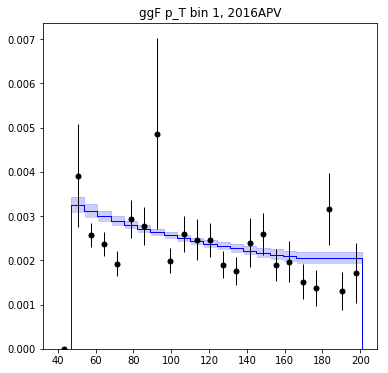

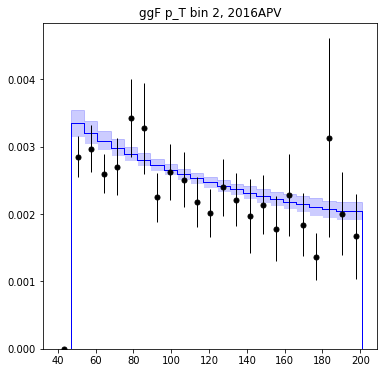

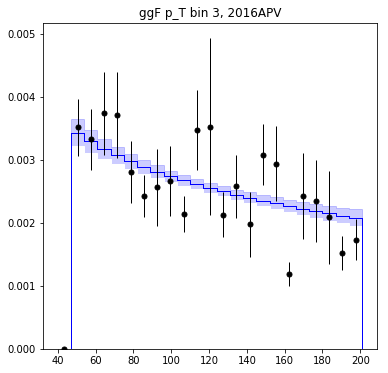

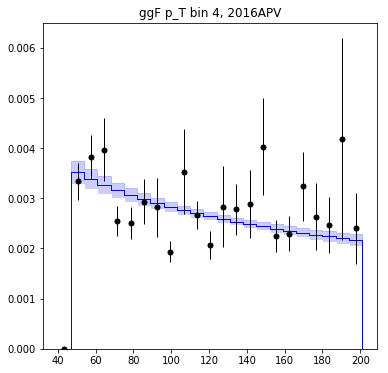

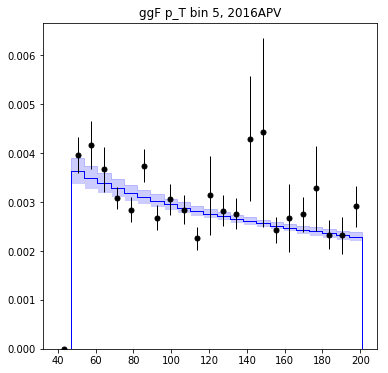

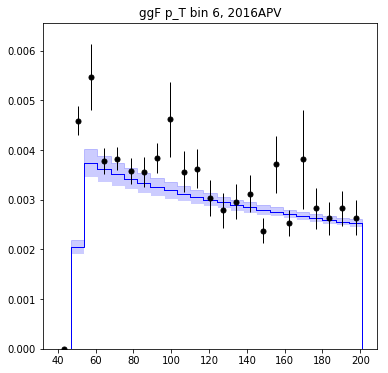

In [7]:
cat = 'ggf'

for ipt in range(6):

    fail_qcd, pass_qcd = [], []
    bins = []
    
    fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
    fail_qcd = fit.Get('shapes_{}/ptbin{}{}{}{}/qcd;1'.format('prefit', ipt, cat, 'fail', year))
    pass_qcd = fit.Get('shapes_{}/ptbin{}{}{}{}/qcd;1'.format('prefit', ipt, cat, 'pass', year))
    pass_qcd.Divide(fail_qcd)

    signalregion = r.TFile.Open('signalregion.root','READ')
    hfail = signalregion.Get('ggf_{}_pt{}_QCD_nominal;1'.format('fail',ipt+1))
    hpass = signalregion.Get('ggf_{}_pt{}_QCD_nominal;1'.format('pass',ipt+1))
    hpass.Divide(hfail)

    ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region=r'ggF p_T bin '+str(ipt+1)+', '+year)
    #ax.legend(labels=['F_{P/F}','QCD pass MC'],frameon=False)

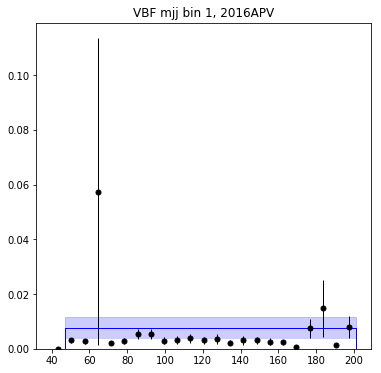

In [8]:
cat = 'vbflo'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj1_QCD_nominal;1'.format('fail'))
hpass = signalregion.Get('vbf_{}_mjj1_QCD_nominal;1'.format('pass'))
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region="VBF mjj bin 1, "+year)
#ax.legend(labels=['F_{P/F}','QCD pass MC'],frameon=False)

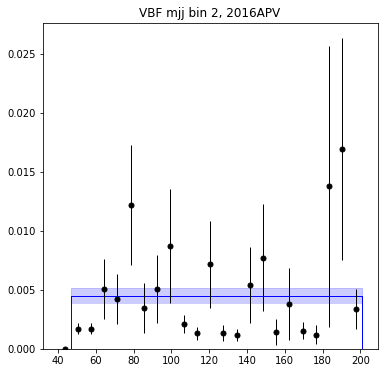

In [9]:
cat = 'vbfhi'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj2_QCD_nominal;1'.format('fail'))
hpass = signalregion.Get('vbf_{}_mjj2_QCD_nominal;1'.format('pass'))
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region="VBF mjj bin 2, "+year)
#ax.legend(labels=['F_{P/F}','QCD pass MC'],frameon=False)

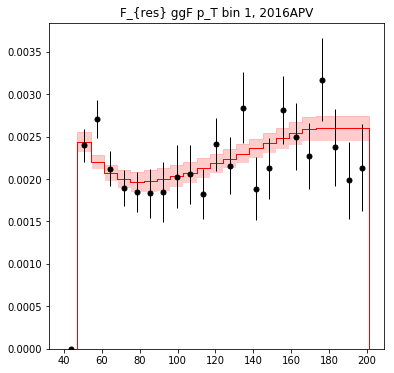

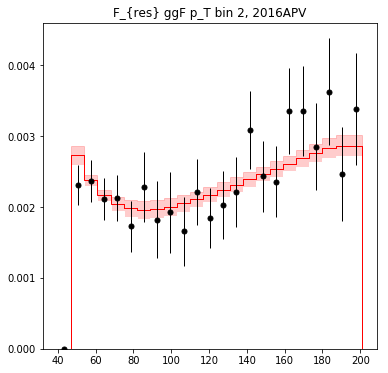

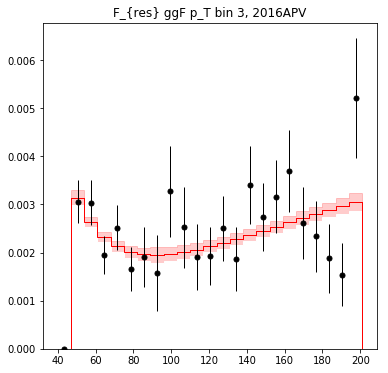

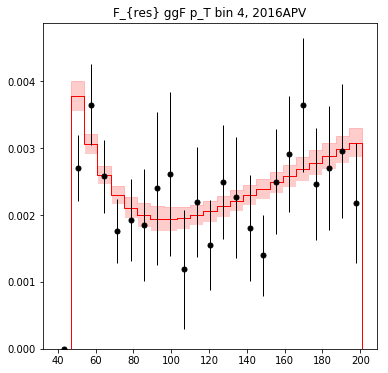

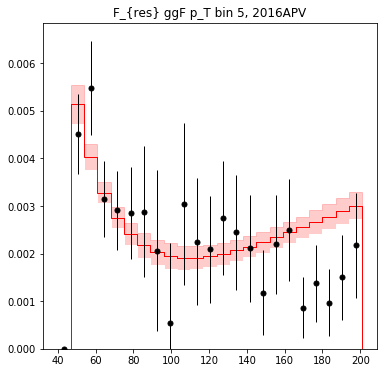

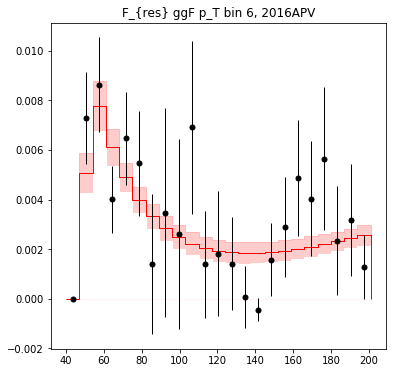

In [10]:
cat = 'ggf'

for ipt in range(6):

    fail_qcd, pass_qcd = [], []
    bins = []
    
    fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
    fail_qcd = fit.Get('shapes_{}/ptbin{}{}{}{}/qcd;1'.format('fit_s', ipt, cat, 'fail', year))
    pass_qcd = fit.Get('shapes_{}/ptbin{}{}{}{}/qcd;1'.format('fit_s', ipt, cat, 'pass', year))
    pass_qcd.Divide(fail_qcd)

    signalregion = r.TFile.Open('signalregion.root','READ')
    hfail = signalregion.Get('ggf_{}_pt{}_data_nominal;1'.format('fail',ipt+1))
    hpass = signalregion.Get('ggf_{}_pt{}_data_nominal;1'.format('pass',ipt+1))
    
    backgrounds = ['Wjets','Zjets','Zjetsbb','EWKW','EWKZ','EWKZbb',
                   'ttbar','singlet','VV','ggF','VBF','ZH','WH','ttH']
    
    for b in backgrounds:
        try:
            bfail = fit.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year, b))
            bfail.Scale(-7)  
            hfail.Add(bfail)
        except:
            print("Missing hist", 'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year,b))
        try:
            bpass = fit.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))
            bpass.Scale(-7)
            hpass.Add(bpass)
        except: 
            print("Missing hist ",'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))    
        
    hpass.Divide(hfail)

    ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region=r'F_{res} ggF p_T bin '+str(ipt+1)+', '+year)
    #ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

('Missing hist', 'shapes_fit_s/ptbin5vbflofail2016APV/Wjets')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2016APV/Wjets')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2016APV/Zjets')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2016APV/Zjets')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2016APV/Zjetsbb')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2016APV/Zjetsbb')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2016APV/EWKW')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2016APV/EWKW')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2016APV/EWKZ')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2016APV/EWKZ')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2016APV/EWKZbb')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2016APV/EWKZbb')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2016APV/ttbar')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2016APV/ttbar')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2016APV/singlet')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2016APV/sing

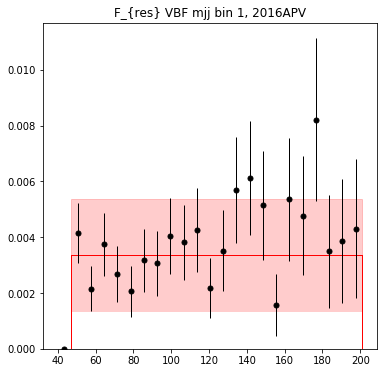

In [11]:
cat = 'vbflo'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'pass', year))
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj1_data_nominal;1'.format('fail'))
hpass = signalregion.Get('vbf_{}_mjj1_data_nominal;1'.format('pass'))

backgrounds = ['Wjets','Zjets','Zjetsbb','EWKW','EWKZ','EWKZbb',
                   'ttbar','singlet','VV','ggF','VBF','ZH','WH','ttH']

for b in backgrounds:
    try:
        bfail = fit.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year, b))
        bfail.Scale(-7)  
        hfail.Add(bfail)
    except:
        print("Missing hist", 'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year,b))
    try:
        bpass = fit.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))
        bpass.Scale(-7)
        hpass.Add(bpass)
    except: 
        print("Missing hist ",'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))    
        
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region="F_{res} VBF mjj bin 1, "+year)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2016APV/Wjets')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2016APV/Wjets')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2016APV/Zjets')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2016APV/Zjets')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2016APV/Zjetsbb')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2016APV/Zjetsbb')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2016APV/EWKW')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2016APV/EWKW')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2016APV/EWKZ')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2016APV/EWKZ')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2016APV/EWKZbb')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2016APV/EWKZbb')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2016APV/ttbar')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2016APV/ttbar')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2016APV/singlet')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2016APV/sing

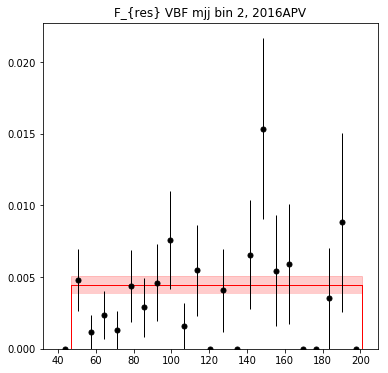

In [12]:
cat = 'vbfhi'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj2_data_nominal;1'.format('fail'))
hpass = signalregion.Get('vbf_{}_mjj2_data_nominal;1'.format('pass'))

backgrounds = ['Wjets','Zjets','Zjetsbb','EWKW','EWKZ','EWKZbb',
                   'ttbar','singlet','VV','ggF','VBF','ZH','WH','ttH']

for b in backgrounds:
    try:
        bfail = fit.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year, b))
        bfail.Scale(-7)  
        hfail.Add(bfail)
    except:
        print("Missing hist", 'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year,b))
    try:
        bpass = fit.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))
        bpass.Scale(-7)
        hpass.Add(bpass)
    except: 
        print("Missing hist ",'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b)) 
     
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region="F_{res} VBF mjj bin 2, "+year)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)